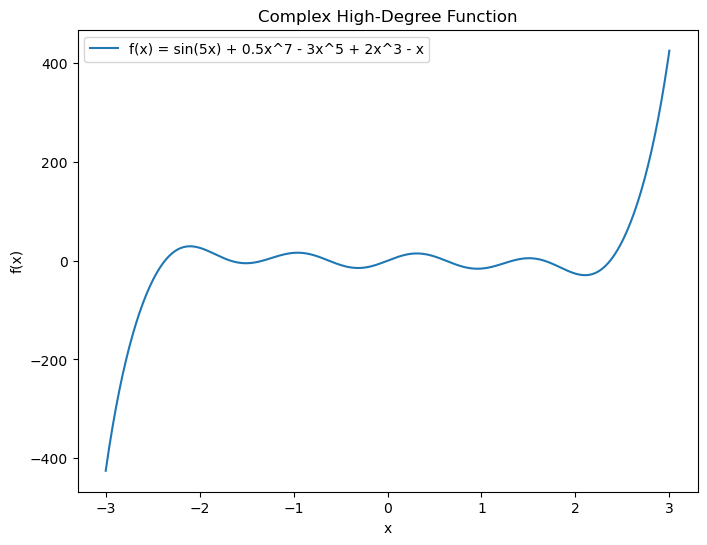

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a complex high-degree polynomial function
def complex_function(x):
    return 15*np.sin(5 * x) + 0.5 * x**7 - 3 * x**5 + 2 * x**3 - x

# Generate x values
x_values = np.linspace(-3, 3, 500)

# Calculate y values
y_values = complex_function(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="f(x) = sin(5x) + 0.5x^7 - 3x^5 + 2x^3 - x")
plt.title("Complex High-Degree Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(False)
plt.legend()
plt.show()


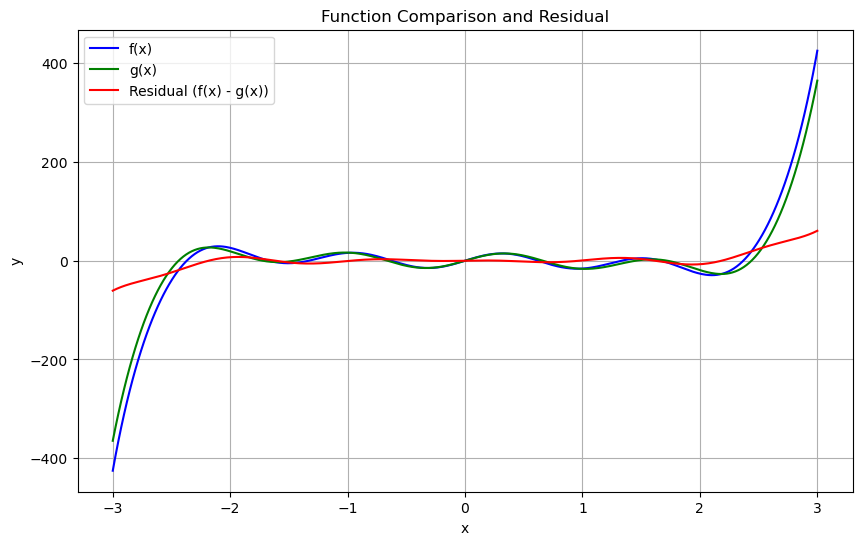

In [2]:
# Define another function g(x) that is similar to f(x) but not identical
def similar_function_g(x):
    return 15*np.sin(4.7 * x) + 0.45 * x**7 - 2.8 * x**5 + 1.8 * x**3 - 0.9 * x

def complex_function(x):
    return 15*np.sin(5 * x) + 0.5 * x**7 - 3 * x**5 + 2 * x**3 - x

# Calculate y values for the new function g(x)
g_values = similar_function_g(x_values)

# Calculate the residual (f(x) - g(x))
f_values_new = complex_function(x_values)
residual_values = f_values_new - g_values

# Plot f(x), g(x), and the residual
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values_new, label="f(x)", color="blue")
plt.plot(x_values, g_values, label="g(x)", color="green")
plt.plot(x_values, residual_values, label="Residual (f(x) - g(x))", color="red")
plt.title("Function Comparison and Residual")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


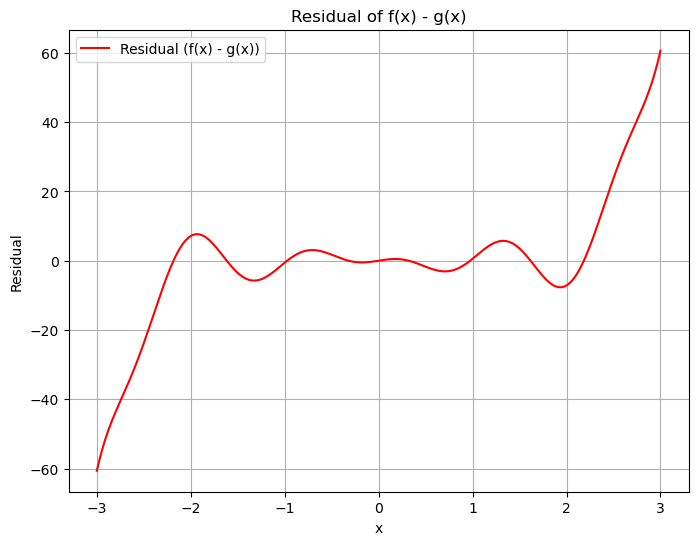

In [3]:
# Plot the residual (f(x) - g(x)) in a separate graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, residual_values, label="Residual (f(x) - g(x))", color="red")
plt.title("Residual of f(x) - g(x)")
plt.xlabel("x")
plt.ylabel("Residual")
plt.grid(True)
plt.legend()
plt.show()


In [3]:
# Updated functions based on user's modification
def updated_similar_function_g(x):
    return 15 * np.sin(4.7 * x) + 0.45 * x**7 - 2.8 * x**5 + 1.8 * x**3 - 0.9 * x

def updated_complex_function(x):
    return 15 * np.sin(5 * x) + 0.5 * x**7 - 3 * x**5 + 2 * x**3 - x

# Compute derivatives (slopes) of the functions
def derivative(func, x_values):
    dx = x_values[1] - x_values[0]  # Small delta x
    return np.gradient(func(x_values), dx)  # Approximate derivative

# Generate x values for the interval [-3, 3]
x_values_new = np.linspace(-3, 3, 500)

# Calculate the slopes of f(x), g(x), and residual f(x) - g(x)
f_slope = derivative(updated_complex_function, x_values_new)
g_slope = derivative(updated_similar_function_g, x_values_new)
residual_slope = derivative(lambda x: updated_complex_function(x) - updated_similar_function_g(x), x_values_new)

# Find the maximum absolute slope values
max_slope_f = np.max(np.abs(f_slope))
max_slope_residual = np.max(np.abs(residual_slope))

def f_double_prime(x):
    return -375 * np.sin(5 * x) + 210 * x**5 - 60 * x**3 + 12 * x

def g_double_prime(x):
    return -330.75 * np.sin(4.7 * x) + 189 * x**5 - 56 * x**3 + 10.8 * x

x_values = np.linspace(-3, 3, 1000)
f_double_prime_max = np.max(np.abs(f_double_prime(x_values)))
g_double_prime_max = np.max(np.abs(g_double_prime(x_values)))

def h_double_prime(x):
    return f_double_prime(x) - g_double_prime(x)

# Calculate the maximum of the second derivatives for f and h
h_double_prime_max = np.max(np.abs(h_double_prime(x_values)))

f_double_prime_max, h_double_prime_max

(49202.14205994108, 5085.263640269448)

In [7]:
from scipy.interpolate import interp1d

# Define the epsilon error level
#epsilon = 10
epsilon = 0.05

# Function to compute the number of pieces for piecewise linear approximation
def piecewise_linear_approximation(func, x_values, epsilon):
    # Initial number of pieces
    n_pieces = 2
    
    while True:
        # Create a linear interpolating function with the current number of pieces
        x_pieces = np.linspace(x_values[0], x_values[-1], n_pieces)
        y_pieces = func(x_pieces)
        linear_approx = interp1d(x_pieces, y_pieces, kind='linear', fill_value='extrapolate')
        
        # Calculate the error between the actual function and the linear approximation
        y_actual = func(x_values)
        y_approx = linear_approx(x_values)
        max_error = np.max(np.abs(y_actual - y_approx))
        
        # If the error is within the allowed epsilon, break the loop
        if max_error <= epsilon:
            break
        
        # Otherwise, increase the number of pieces
        n_pieces += 1
    
    return n_pieces

# Generate x values for the interval [-3, 3]
x_values_new = np.linspace(-3, 3, 500)

# Calculate the number of pieces for f(x) and f(x) - g(x)
n_pieces_f = piecewise_linear_approximation(updated_complex_function, x_values_new, epsilon)
n_pieces_residual = piecewise_linear_approximation(lambda x: updated_complex_function(x) - updated_similar_function_g(x), x_values_new, epsilon)

n_pieces_f, n_pieces_residual


(475, 201)

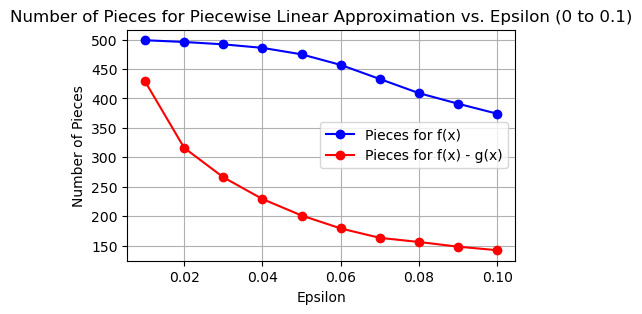

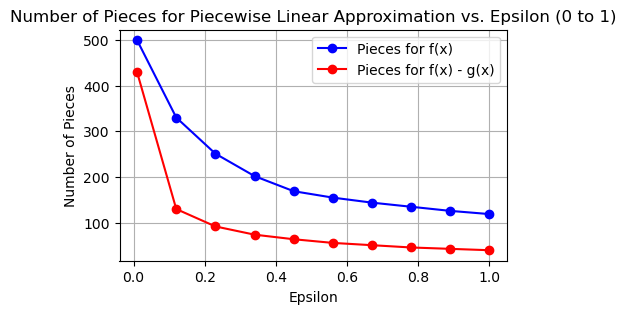

In [18]:
# Define epsilon values for 0 to 0.1 and 0 to 1 with 10 points each
epsilon_values_0_01 = np.linspace(0.01, 0.1, 10)
epsilon_values_0_1 = np.linspace(0.01, 1, 10)

# Initialize lists to store the number of pieces for each epsilon range
pieces_f_0_01 = []
pieces_residual_0_01 = []
pieces_f_0_1 = []
pieces_residual_0_1 = []

# Loop through the epsilon values (0 to 0.1)
for epsilon in epsilon_values_0_01:
    n_pieces_f_0_01 = piecewise_linear_approximation(updated_complex_function, x_values_new, epsilon)
    n_pieces_residual_0_01 = piecewise_linear_approximation(lambda x: updated_complex_function(x) - updated_similar_function_g(x), x_values_new, epsilon)
    pieces_f_0_01.append(n_pieces_f_0_01)
    pieces_residual_0_01.append(n_pieces_residual_0_01)

# Loop through the epsilon values (0 to 1)
for epsilon in epsilon_values_0_1:
    n_pieces_f_0_1 = piecewise_linear_approximation(updated_complex_function, x_values_new, epsilon)
    n_pieces_residual_0_1 = piecewise_linear_approximation(lambda x: updated_complex_function(x) - updated_similar_function_g(x), x_values_new, epsilon)
    pieces_f_0_1.append(n_pieces_f_0_1)
    pieces_residual_0_1.append(n_pieces_residual_0_1)

# Plot for epsilon range 0 to 0.1
plt.figure(figsize=(5, 3))
plt.plot(epsilon_values_0_01, pieces_f_0_01, label="Pieces for f(x)", color="blue", marker='o')
plt.plot(epsilon_values_0_01, pieces_residual_0_01, label="Pieces for f(x) - g(x)", color="red", marker='o')
plt.title("Number of Pieces for Piecewise Linear Approximation vs. Epsilon (0 to 0.1)")
plt.xlabel("Epsilon")
plt.ylabel("Number of Pieces")
plt.legend()
plt.grid(True)
plt.show()

# Plot for epsilon range 0 to 1
plt.figure(figsize=(5, 3))
plt.plot(epsilon_values_0_1, pieces_f_0_1, label="Pieces for f(x)", color="blue", marker='o')
plt.plot(epsilon_values_0_1, pieces_residual_0_1, label="Pieces for f(x) - g(x)", color="red", marker='o')
plt.title("Number of Pieces for Piecewise Linear Approximation vs. Epsilon (0 to 1)")
plt.xlabel("Epsilon")
plt.ylabel("Number of Pieces")
plt.legend()
plt.grid(True)
plt.show()


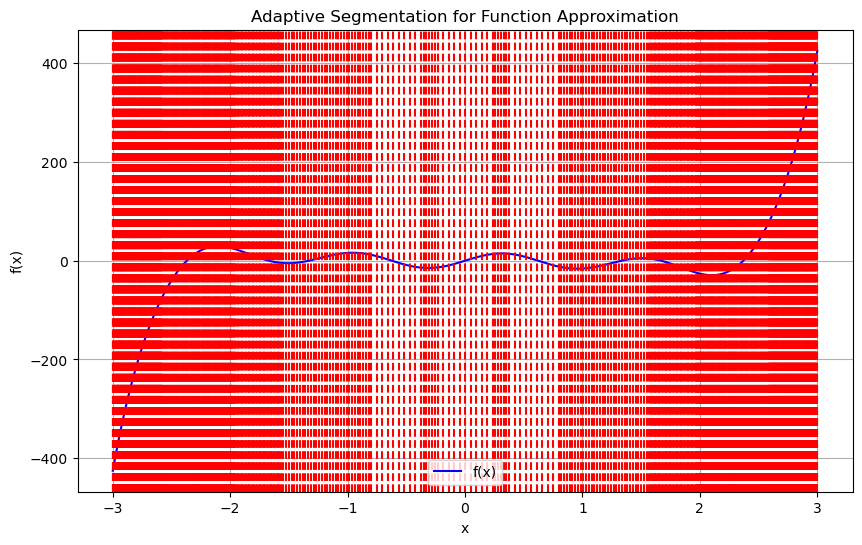

Total number of segments: 670


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 15*np.sin(5 * x) + 0.5 * x**7 - 3 * x**5 + 2 * x**3 - x

def f_second_derivative(x):
    return -375 * np.sin(5 * x) + 210 * x**5 - 60 * x**3 + 12 * x

def estimate_error(segment, max_second_deriv, epsilon):
    segment_length = segment[1] - segment[0]
    return (segment_length ** 2 / 8) * max_second_deriv

def adaptive_segmentation(func, second_derivative_func, x_range, epsilon):
    segments = [[x_range[0], x_range[1]]]
    max_iterations = 1000 
    iteration = 0
    
    while iteration < max_iterations:
        new_segments = []
        refined = False
        
        for segment in segments:
            x_values = np.linspace(segment[0], segment[1], 100)
            max_second_deriv = np.max(np.abs(second_derivative_func(x_values)))
            
            error = estimate_error(segment, max_second_deriv, epsilon)
            
            if error > epsilon:
                mid_point = (segment[0] + segment[1]) / 2
                new_segments.append([segment[0], mid_point])
                new_segments.append([mid_point, segment[1]])
                refined = True
            else:
                new_segments.append(segment)
        
        if not refined:
            break
        
        segments = new_segments
        iteration += 1
    
    return segments

# 参数设置
x_range = [-3, 3]
epsilon = 0.1

# 自适应分段
segments = adaptive_segmentation(f, f_second_derivative, x_range, epsilon)

# 可视化分段
x_values = np.linspace(x_range[0], x_range[1], 500)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x)", color="blue")
for segment in segments:
    plt.axvline(x=segment[0], color='red', linestyle='--')

plt.title("Adaptive Segmentation for Function Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

print(f"Total number of segments: {len(segments)}")


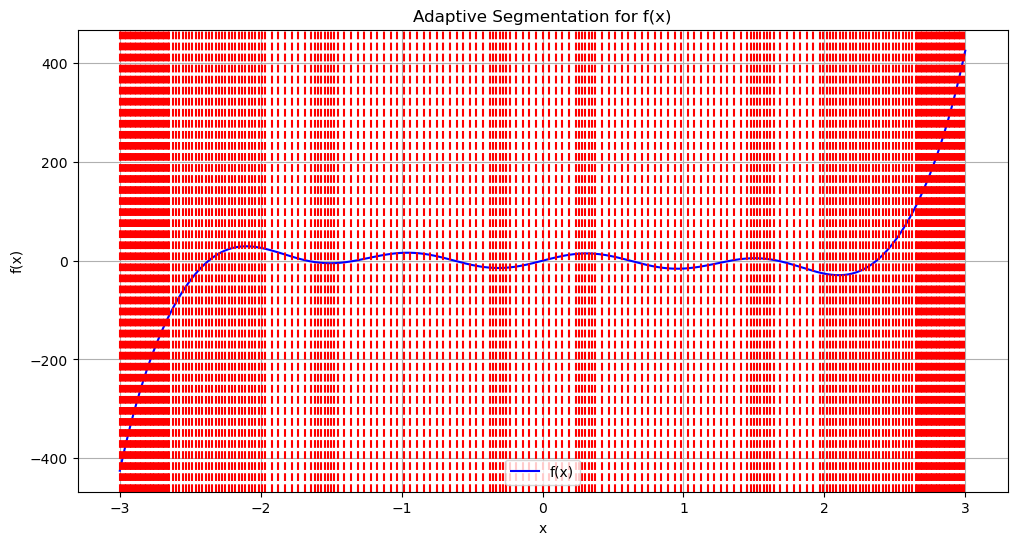

Total number of segments for f(x): 216


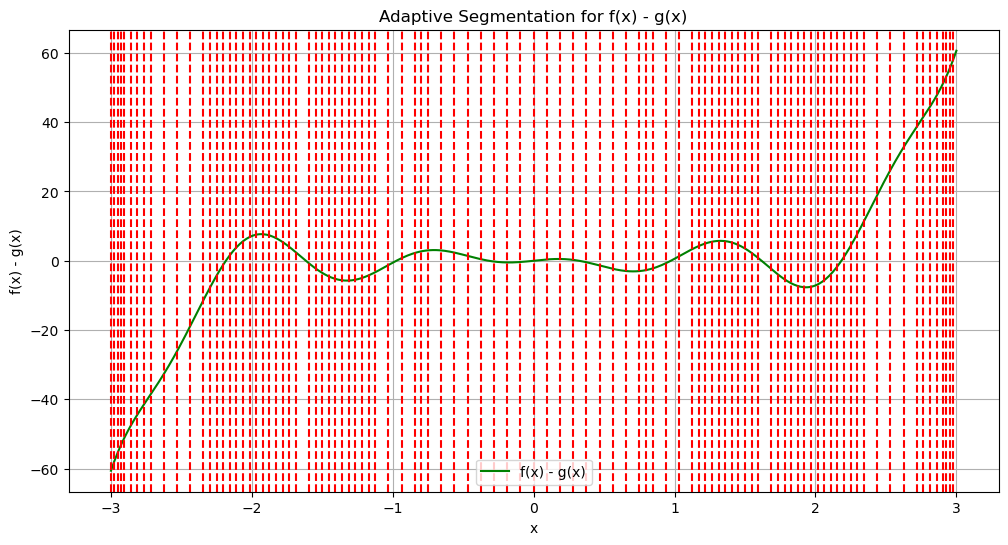

Total number of segments for f(x) - g(x): 100


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f(x) and g(x)
def f(x):
    return 15 * np.sin(5 * x) + 0.5 * x**7 - 3 * x**5 + 2 * x**3 - x

def g(x):
    return 15 * np.sin(4.7 * x) + 0.45 * x**7 - 2.8 * x**5 + 1.8 * x**3 - 0.9 * x

# Define second derivative calculation using finite differences
def second_derivative(func, x_values):
    dx = x_values[1] - x_values[0]  # Step size
    return np.gradient(np.gradient(func(x_values), dx), dx)

# Error estimation function
def estimate_error(segment, max_second_deriv, epsilon):
    segment_length = segment[1] - segment[0]
    return (segment_length ** 2 / 8) * max_second_deriv

# Adaptive segmentation function
def adaptive_segmentation(func, second_derivative_func, x_range, epsilon):
    segments = [[x_range[0], x_range[1]]]
    max_iterations = 1000  # Prevent infinite loop
    iteration = 0
    
    while iteration < max_iterations:
        new_segments = []
        refined = False
        
        for segment in segments:
            # Calculate the max second derivative in the current segment
            x_values = np.linspace(segment[0], segment[1], 100)
            max_second_deriv = np.max(np.abs(second_derivative_func(x_values)))
            
            # Estimate the error in the current segment
            error = estimate_error(segment, max_second_deriv, epsilon)
            
            if error > epsilon:
                # If error exceeds tolerance, split the segment
                mid_point = (segment[0] + segment[1]) / 2
                new_segments.append([segment[0], mid_point])
                new_segments.append([mid_point, segment[1]])
                refined = True
            else:
                # Keep the segment if within tolerance
                new_segments.append(segment)
        
        # If no further refinement is needed, break the loop
        if not refined:
            break
        
        segments = new_segments
        iteration += 1
    
    return segments

# Set parameters
x_range = [-3, 3]
epsilon = 0.1

# Adaptive segmentation for f(x)
segments_f = adaptive_segmentation(f, lambda x: second_derivative(f, x), x_range, epsilon)

# Adaptive segmentation for f(x) - g(x)
segments_fg = adaptive_segmentation(lambda x: f(x) - g(x), 
                                    lambda x: second_derivative(lambda x: f(x) - g(x), x), 
                                    x_range, epsilon)

# Visualization for f(x)
x_values = np.linspace(x_range[0], x_range[1], 500)
y_values_f = f(x_values)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values_f, label="f(x)", color="blue")
for segment in segments_f:
    plt.axvline(x=segment[0], color='red', linestyle='--')

plt.title("Adaptive Segmentation for f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

print(f"Total number of segments for f(x): {len(segments_f)}")

# Visualization for f(x) - g(x)
y_values_fg = f(x_values) - g(x_values)

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values_fg, label="f(x) - g(x)", color="green")
for segment in segments_fg:
    plt.axvline(x=segment[0], color='red', linestyle='--')

plt.title("Adaptive Segmentation for f(x) - g(x)")
plt.xlabel("x")
plt.ylabel("f(x) - g(x)")
plt.grid(True)
plt.legend()
plt.show()

print(f"Total number of segments for f(x) - g(x): {len(segments_fg)}")


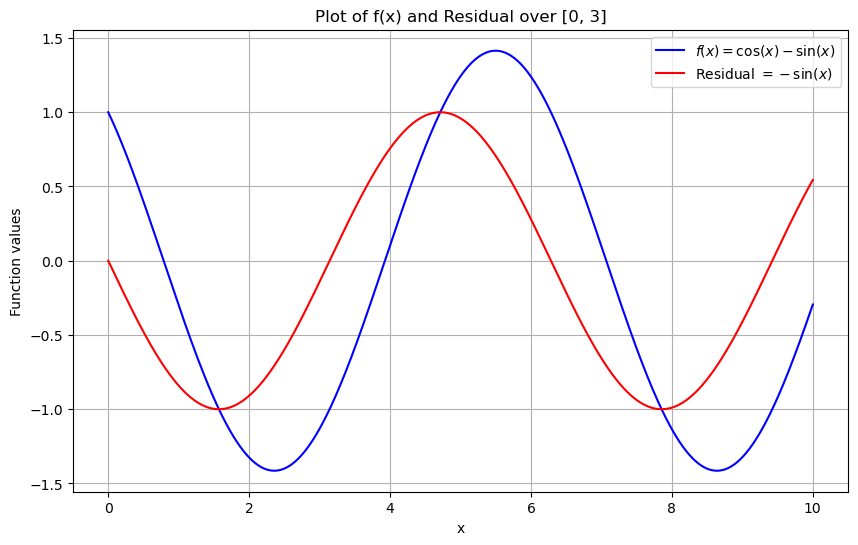

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the function f(x) = cos(x) - sin(x) and the physics model g(x) = cos(x)
# The residual is defined as r(x) = f(x) - g(x) = -sin(x)

a, b = 0, 10
x_values = np.linspace(a, b, 1000)

# Define functions f(x), g(x), and residual r(x)
f = lambda x: np.cos(x) - np.sin(x)
g = lambda x: np.cos(x)
residual = lambda x: -np.sin(x)

# Compute f(x), g(x), and residual(x) for plotting
f_values = f(x_values)
g_values = g(x_values)
residual_values = residual(x_values)

# Plot f(x) and residual(x) on the same graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, f_values, label=r'$f(x) = \cos(x) - \sin(x)$', color='blue')
plt.plot(x_values, residual_values, label=r'Residual $= -\sin(x)$', color='red')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Plot of f(x) and Residual over [0, 10]')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# To calculate the Lipschitz constant for a function over an interval, we find the maximum absolute value of its derivative over the interval.

# Define the derivatives of f(x) and residual(x)
f_prime = lambda x: -np.sin(x) - np.cos(x)  # Derivative of f(x) = cos(x) - sin(x)
residual_prime = lambda x: -np.cos(x)       # Derivative of residual(x) = -sin(x)

# Sample points to estimate the Lipschitz constant
x_deriv_values = np.linspace(a, b, 1000)

# Compute the absolute values of the derivatives over the interval
f_prime_values = np.abs(f_prime(x_deriv_values))
residual_prime_values = np.abs(residual_prime(x_deriv_values))

# Lipschitz constants are the maximum values of the absolute derivatives over the interval
L_f = np.max(f_prime_values)
L_residual = np.max(residual_prime_values)

L_f, L_residual


(1.4142119363957846, 1.0)

In [4]:

epsilon = 0.1  # Adjust as needed

# Calculate the number of pieces required for f and residual using the theorem
N_f = int(np.ceil((L_f * (b - a))**2 / (4 * epsilon)))
N_residual = int(np.ceil((L_residual * (b - a))**2 / (4 * epsilon)))

N_f, N_residual


(500, 250)

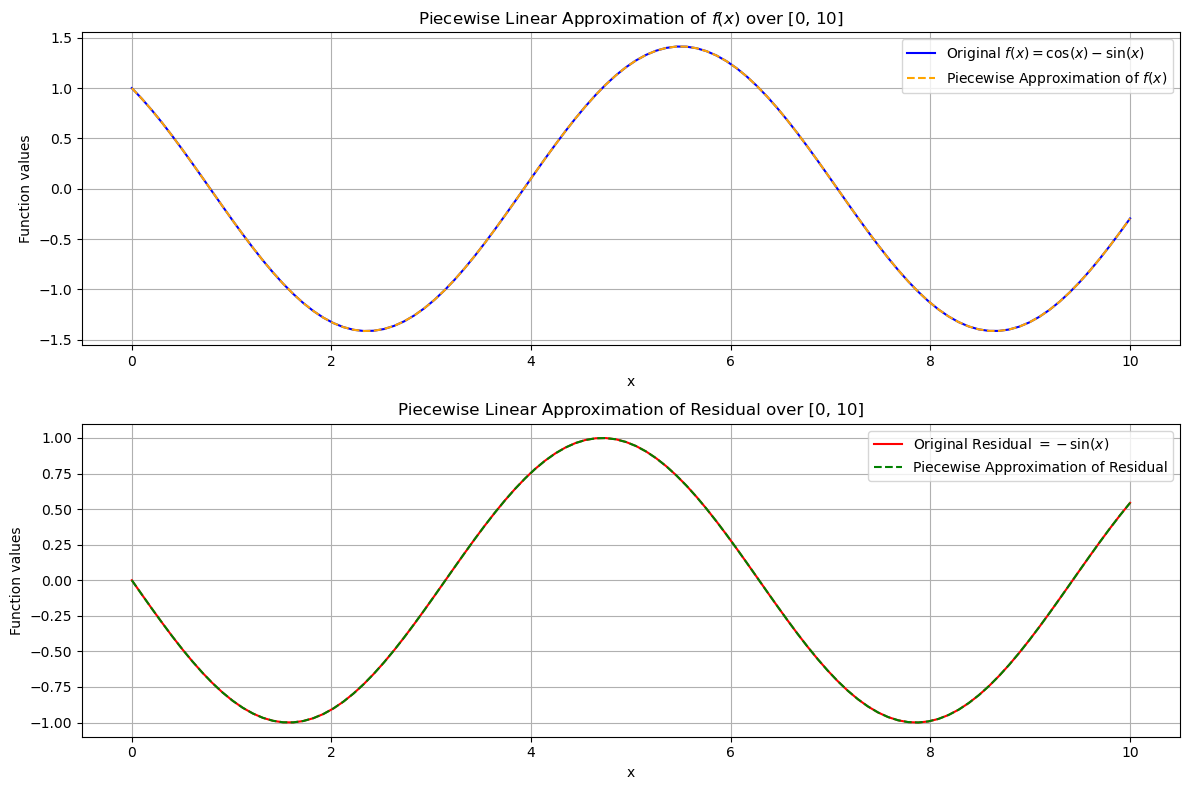

In [5]:
# Re-define the functions and variables since the environment reset

import numpy as np
import matplotlib.pyplot as plt

# Interval [0, 10]
a, b = 0, 10
x_values = np.linspace(a, b, 100)

# Define the original functions
f = lambda x: np.cos(x) - np.sin(x)
residual = lambda x: -np.sin(x)

# Lipschitz constants calculated before
L_f = 1.4142119363957848  # for f(x)
L_residual = 1.0          # for residual

# Calculated number of pieces for piecewise linear approximation
N_f = 500
N_residual = 250

# Define the function to perform piecewise linear approximation
def piecewise_linear_approximation(func, a, b, num_pieces):
    x_breakpoints = np.linspace(a, b, num_pieces + 1)
    y_values = func(x_breakpoints)
    return lambda x: np.interp(x, x_breakpoints, y_values)

# Generate the piecewise linear approximations for f(x) and the residual
f_approx = piecewise_linear_approximation(f, a, b, N_f)
residual_approx = piecewise_linear_approximation(residual, a, b, N_residual)

# Evaluate the approximations for plotting
f_values = f(x_values)
residual_values = residual(x_values)
f_approx_values = f_approx(x_values)
residual_approx_values = residual_approx(x_values)

# Plot the original and approximated functions for f(x) and residual
plt.figure(figsize=(12, 8))

# Plot for f(x) and its approximation
plt.subplot(2, 1, 1)
plt.plot(x_values, f_values, label=r'Original $f(x) = \cos(x) - \sin(x)$', color='blue')
plt.plot(x_values, f_approx_values, label='Piecewise Approximation of $f(x)$', linestyle='--', color='orange')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Piecewise Linear Approximation of $f(x)$ over [0, 10]')
plt.legend()
plt.grid(True)

# Plot for residual and its approximation
plt.subplot(2, 1, 2)
plt.plot(x_values, residual_values, label=r'Original Residual $= -\sin(x)$', color='red')
plt.plot(x_values, residual_approx_values, label='Piecewise Approximation of Residual', linestyle='--', color='green')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Piecewise Linear Approximation of Residual over [0, 10]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
from scipy.interpolate import interp1d

# Function to compute the number of pieces for piecewise linear approximation based on epsilon
def piecewise_linear_approximation(func, x_values, epsilon):
    n_pieces = 2  # Start with an initial number of pieces
    
    while True:
        # Create breakpoints and linear interpolation based on current number of pieces
        x_pieces = np.linspace(x_values[0], x_values[-1], n_pieces)
        y_pieces = func(x_pieces)
        linear_approx = interp1d(x_pieces, y_pieces, kind='linear', fill_value='extrapolate')
        
        # Calculate the error between actual function values and linear approximation
        y_actual = func(x_values)
        y_approx = linear_approx(x_values)
        max_error = np.max(np.abs(y_actual - y_approx))
        
        # Check if maximum error is within allowed epsilon
        if max_error <= epsilon:
            break
        
        # Increase the number of pieces if the error is too high
        n_pieces += 1
    
    return n_pieces

# Define epsilon for tolerance in approximation
epsilon = 0.01

# Define the x values for checking the approximation error over the interval [0, 10]
x_values_new = np.linspace(0, 10, 5000)

# Calculate the number of pieces required for f(x) and the residual
n_pieces_f = piecewise_linear_approximation(f, x_values_new, epsilon)
n_pieces_residual = piecewise_linear_approximation(residual, x_values_new, epsilon)

n_pieces_f, n_pieces_residual


(43, 37)

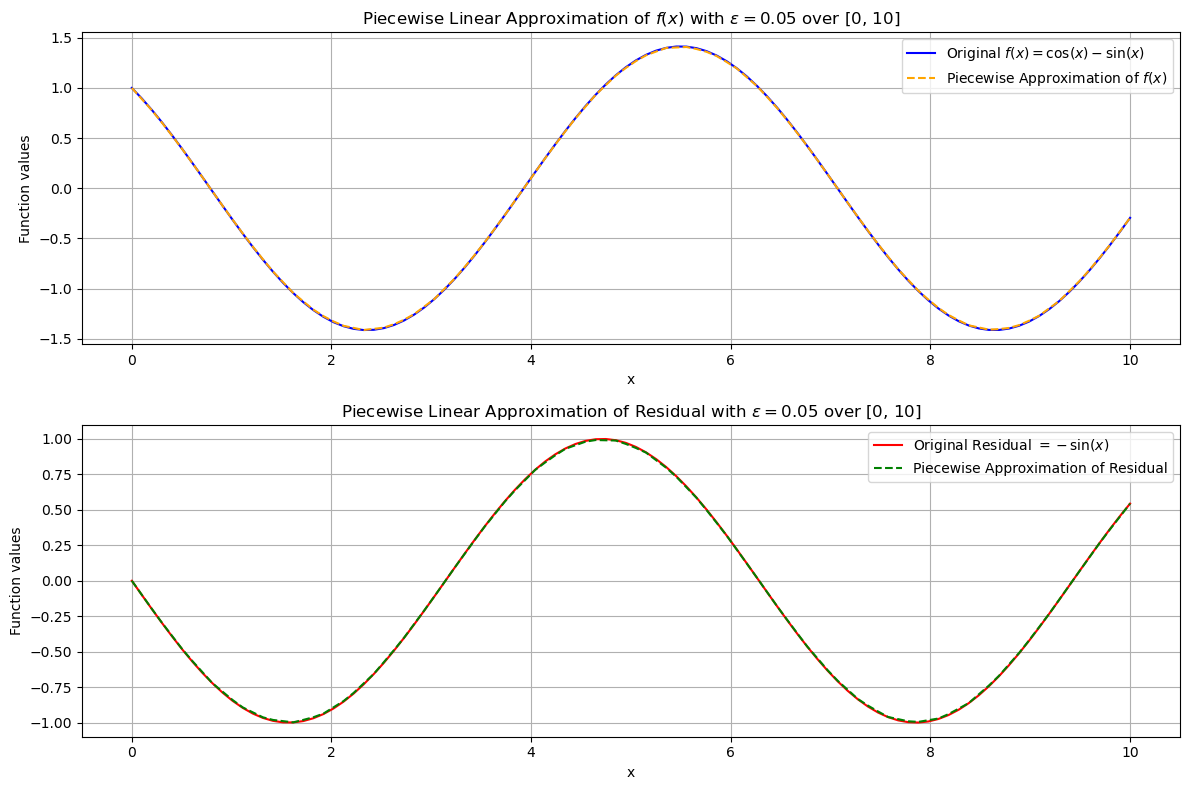

In [13]:
# Adjust function to return an interpolation that can be directly evaluated
def create_piecewise_linear_approximation(func, a, b, num_pieces):
    x_pieces = np.linspace(a, b, num_pieces + 1)
    y_pieces = func(x_pieces)
    return interp1d(x_pieces, y_pieces, kind='linear', fill_value='extrapolate')

# Create piecewise linear approximations with the computed number of pieces
f_approx_func = create_piecewise_linear_approximation(f, 0, 10, n_pieces_f)
residual_approx_func = create_piecewise_linear_approximation(residual, 0, 10, n_pieces_residual)

# Evaluate the approximations over x_values for plotting
f_approx_values_final = f_approx_func(x_values)
residual_approx_values_final = residual_approx_func(x_values)

# Plot the original and approximated functions for f(x) and residual
plt.figure(figsize=(12, 8))

# Plot for f(x) and its approximation
plt.subplot(2, 1, 1)
plt.plot(x_values, f(x_values), label=r'Original $f(x) = \cos(x) - \sin(x)$', color='blue')
plt.plot(x_values, f_approx_values_final, label='Piecewise Approximation of $f(x)$', linestyle='--', color='orange')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Piecewise Linear Approximation of $f(x)$ with $\epsilon = 0.05$ over [0, 10]')
plt.legend()
plt.grid(True)

# Plot for residual and its approximation
plt.subplot(2, 1, 2)
plt.plot(x_values, residual(x_values), label=r'Original Residual $= -\sin(x)$', color='red')
plt.plot(x_values, residual_approx_values_final, label='Piecewise Approximation of Residual', linestyle='--', color='green')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Piecewise Linear Approximation of Residual with $\epsilon = 0.05$ over [0, 10]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


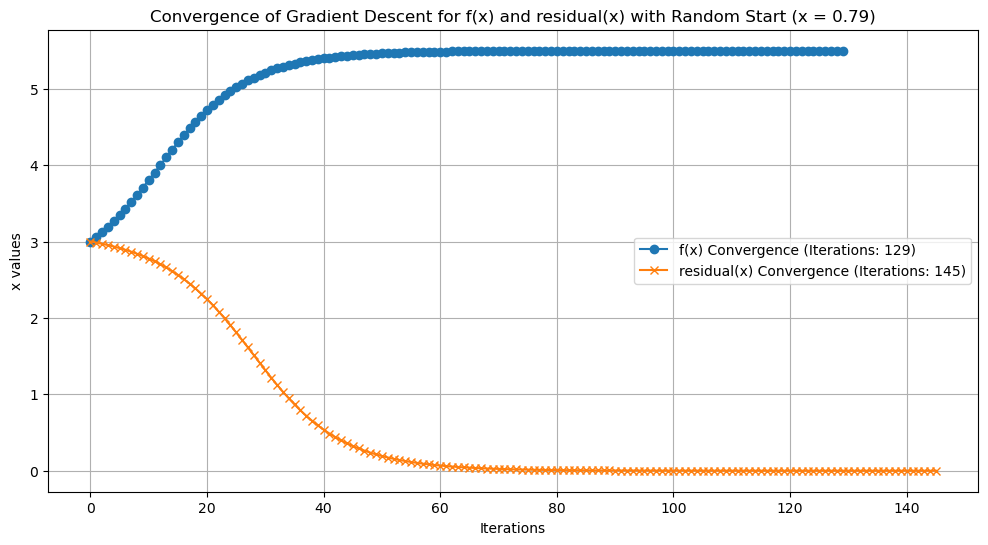

In [26]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the functions and their gradients
def f(x):
    return np.sin(x) - np.cos(x)

def g(x):
    return np.sin(x)

def residual(x):
    return f(x) - g(x)  # -cos(x)

# Gradients of the functions
def grad_f(x):
    return np.cos(x) + np.sin(x)

def grad_residual(x):
    return np.sin(x)  # Derivative of -cos(x)

# Lipschitz constant approximation using max derivative over interval [0, 10]
x_samples = np.linspace(0, 10, 10000)
L_f = np.max(np.abs(grad_f(x_samples)))
L_residual = np.max(np.abs(grad_residual(x_samples)))

random_start = random.uniform(0, 10)

# Step sizes based on Lipschitz constants
eta_f = 0.1 / L_f
eta_residual = 0.1 / L_residual

# Gradient descent function with a random starting point
def gradient_descent_random_start(grad, eta, tol=1e-6, max_iters=10000, start_point=random_start):
    x = 3
    #x = start_point  # Starting point is now a random number in [0, 10]
    x_values = [x]
    for i in range(max_iters):
        x_new = x - eta * grad(x)
        x_values.append(x_new)
        if np.abs(x_new - x) < tol:
            return x_values, i + 1  # Ensure at least 1 iteration is recorded
        x = x_new
    return x_values, max_iters

# Run gradient descent for both f and residual with the new random start
x_values_f_rand, iterations_f_rand = gradient_descent_random_start(grad_f, eta_f)
x_values_residual_rand, iterations_residual_rand = gradient_descent_random_start(grad_residual, eta_residual)

# Plot results with random starting point
plt.figure(figsize=(12, 6))

# Plot the gradient descent path for f with random starting point
plt.plot(range(iterations_f_rand + 1), x_values_f_rand[:iterations_f_rand + 1], label=f'f(x) Convergence (Iterations: {iterations_f_rand})', marker='o')

# Plot the gradient descent path for residual with random starting point
plt.plot(range(iterations_residual_rand + 1), x_values_residual_rand[:iterations_residual_rand + 1], label=f'residual(x) Convergence (Iterations: {iterations_residual_rand})', marker='x')

# Plot settings
plt.xlabel('Iterations')
plt.ylabel('x values')
plt.title(f'Convergence of Gradient Descent for f(x) and residual(x) with Random Start (x = {random_start:.2f})')
plt.legend()
plt.grid(True)
plt.show()

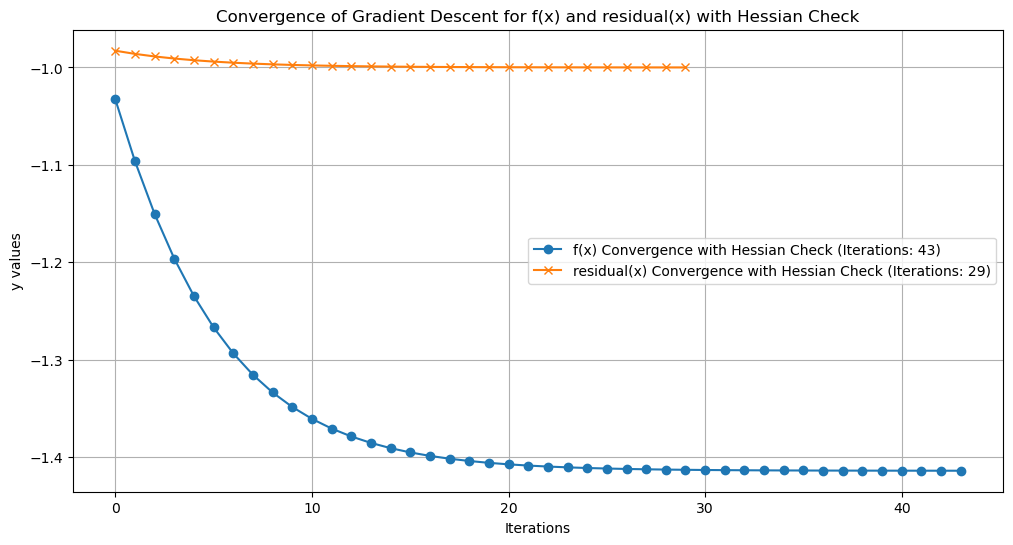

In [27]:
# Modify gradient descent to use second derivative (Hessian) check to ensure minimum point

# Second derivatives (Hessian approximations) for checking if at a minimum
def hessian_f(x):
    return -np.sin(x) + np.cos(x)  # Second derivative of f(x)

def hessian_residual(x):
    return np.cos(x)  # Second derivative of residual(x) = -cos(x)

# Gradient descent with second derivative check
def gradient_descent_with_hessian_check(grad, hessian, func, eta, tol=1e-3, max_iters=10000, restarts=5):
    best_y_values = []
    best_iterations = max_iters
    
    for _ in range(restarts):
        # Start at a random point in the interval [0, 10]
        x = random.uniform(0, 10)
        y_values = [func(x)]
        
        for i in range(max_iters):
            grad_value = grad(x)
            hessian_value = hessian(x)
            
            # Check if Hessian indicates a minimum point (positive for a minimum)
            if hessian_value <= 0:
                eta = -abs(eta) if grad_value > 0 else abs(eta)  # Correct direction if needed
            else:
                eta = abs(eta)  # Move in gradient descent direction toward minimum
            
            x_new = x - eta * grad_value
            y_values.append(func(x_new))
            
            if np.abs(x_new - x) < tol and hessian_value > 0:
                if i + 1 < best_iterations:
                    best_iterations = i + 1
                    best_y_values = y_values
                break
            
            x = x_new
        
        if i == max_iters - 1 and len(y_values) < best_iterations:
            best_y_values = y_values
            best_iterations = max_iters

    return best_y_values, best_iterations

# Run gradient descent with Hessian check for both f and residual
y_values_f_hessian, iterations_f_hessian = gradient_descent_with_hessian_check(grad_f, hessian_f, f, eta_f)
y_values_residual_hessian, iterations_residual_hessian = gradient_descent_with_hessian_check(grad_residual, hessian_residual, residual, eta_residual)

# Plot results with Hessian check
plt.figure(figsize=(12, 6))

# Plot the gradient descent path for f with Hessian check
plt.plot(range(iterations_f_hessian + 1), y_values_f_hessian[:iterations_f_hessian + 1], label=f'f(x) Convergence with Hessian Check (Iterations: {iterations_f_hessian})', marker='o')

# Plot the gradient descent path for residual with Hessian check
plt.plot(range(iterations_residual_hessian + 1), y_values_residual_hessian[:iterations_residual_hessian + 1], label=f'residual(x) Convergence with Hessian Check (Iterations: {iterations_residual_hessian})', marker='x')

# Plot settings
plt.xlabel('Iterations')
plt.ylabel('y values')
plt.title('Convergence of Gradient Descent for f(x) and residual(x) with Hessian Check')
plt.legend()
plt.grid(True)
plt.show()
